# Exploring Income Factors

I want to the most important income determinant factors for Income in Amercia, controlling for Age.

This project is a large undertaking for a single computer, and as such will be split into 3 parts. In the first part, I will import and combine the data. The second part will pertain to my data cleaning and feature selection. Finally, I will perform descriptive modeling on the most important factors using linear mixed effect modeling.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import savReaderWriter

# Part 1: Importing the Data

I will use data from the General Social Survey (GSS) from the NORC. This survey has been collecting data on the quality of American life, especially through the lens of work and employeee, binanually since 1972. 

Of course, as our understanding of underlying social forces has changed, so has the GSS survey, going through multiple changes and iterations since its inception.  As such, I will only be using data from the 2000 ownwards, to ensure that I can take advantage of the current survey versions' increased sophistication.

The scope of this project is to examine the most important Income factors when controlling to age using a linear mixed effect model. 

This problem could be attempted to be modeled with the Pareto distribution, since that is the distribution modeling income. However there is no mixed effect pareto model in python, so I would not be able to control for age. 

This problem could also be modeled with a mixed effect random forest model, since it is more robust and accurate overall than the Linear Mixed Effect model. However, mixed effect random forests are not nearly as descriptive as linear mixed effect models, so it would be much more difficult to answer the second part of my research question, how the important features impact income.

This is a very large data set. I must be read from it's individual years and then combined. To save on computer memory, I will do that combining here. 

In [2]:
# function to the GSS sav files and return them as dataframes
def import_sav(filepath):
    with savReaderWriter.SavReader(filepath) as reader:
        header = reader.header
        records = reader.all()
        header_str = []
        for feature in header:
            header_str.append(feature.decode('ascii'))
        df = pd.DataFrame(records, columns = header_str)
        return df

In [3]:
# import the individual sav files
work00 = import_sav('C:\\Code\\SSP\\work00.sav')
work02 = import_sav('C:\\Code\\SSP\\work02.sav')
work04 = import_sav('C:\\Code\\SSP\\work04.sav')
work06 = import_sav('C:\\Code\\SSP\\work06.sav')
work08 = import_sav('C:\\Code\\SSP\\work08.sav')
work10 = import_sav('C:\\Code\\SSP\\work10.sav')
work12 = import_sav('C:\\Code\\SSP\\work12.sav')
work14 = import_sav('C:\\Code\\SSP\\work14.sav')
work16 = import_sav('C:\\Code\\SSP\\work16.sav')

# Combining Years

Now that I have all the years imported, I will combine them into one. Before I do that, I must determine which features all the years share.

In [4]:
# create a list of common features between all GSS years
shared_features = list(set(work16.columns).intersection(work14.columns))
shared_features = list(set(shared_features).intersection(work12.columns))
shared_features = list(set(shared_features).intersection(work10.columns))
shared_features = list(set(shared_features).intersection(work08.columns))
shared_features = list(set(shared_features).intersection(work06.columns))
shared_features = list(set(shared_features).intersection(work04.columns))
shared_features = list(set(shared_features).intersection(work02.columns))
shared_features = list(set(shared_features).intersection(work00.columns))

In [5]:
print('There are ',len(shared_features),' shared features')

There are  407  shared features


In [6]:
work_mult = pd.concat([work16[shared_features],work14[shared_features],work12[shared_features],
                       work10[shared_features],work08[shared_features],work06[shared_features],work04[shared_features],
                       work02[shared_features],work00[shared_features]])

In [7]:
work_mult.reset_index(drop=True,inplace=True)

# Checking Income and Age Interaction

Before I move onto the next part, I want to check Income's interaction with my control gourp: Age.

I will graph income and age.

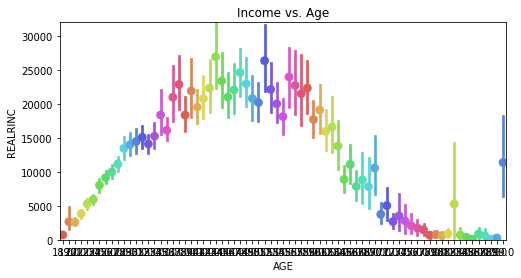

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
sns.pointplot(x='AGE',y="REALRINC",data=work_mult,alpha=0.1,palette=sns.color_palette("hls", 20),ax=ax)
plt.title('Income vs. Age')
plt.ylim(0,32000)
plt.show()

Age has a strangely relationship with Income. Young people in their early 20s have simililar incomes to people in their 70s. And many other ages present similar similarities. Controlling for age will allow for the model to understand can calculate for the differences between people about to start their careers and people in retirement. 

In [9]:
work_mult.to_csv('C:\\Code\\SSP\\workmult.csv')

Now that my data is combined and saved, I can move onto feature selection.